# Análise Exploratória de Dados (EDA) Flores Iris

### Importação de bibliotecas relevantes

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sns.set()

Leitura do arquivo de dados:

In [5]:
dados = pd.read_csv('iris_dataset.csv')

## 1. Verificação básica dos dados

#### Primeiro vamos verificar quais os tipos de dados e se precisam de alguma espécie de tratamento

In [8]:
dados.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Sabemos que não existem variáveis categoricas, apenas numéricas, o que facilita nossa análise

In [10]:
dados.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Observando a média, o mínimo e o máximo de cada coluna, podemos perceber que os dados não possuem uma variação significativa de grandeza para que seja necessário uma normalização (e aparentemente não vemos nenhum outlier, mas vamos confirmar mais para frente)

In [12]:
dados.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

Também conseguimos eliminar a necessidade de tratamento de dados inexistentes ou incoerentes (já que são todos int)

## 2. Visualização geral dos dados

Já sabemos que os dados estão aptos para análise exploratória, então vamos verificar a relação entre as variáveis e a disposição em um gráfico.

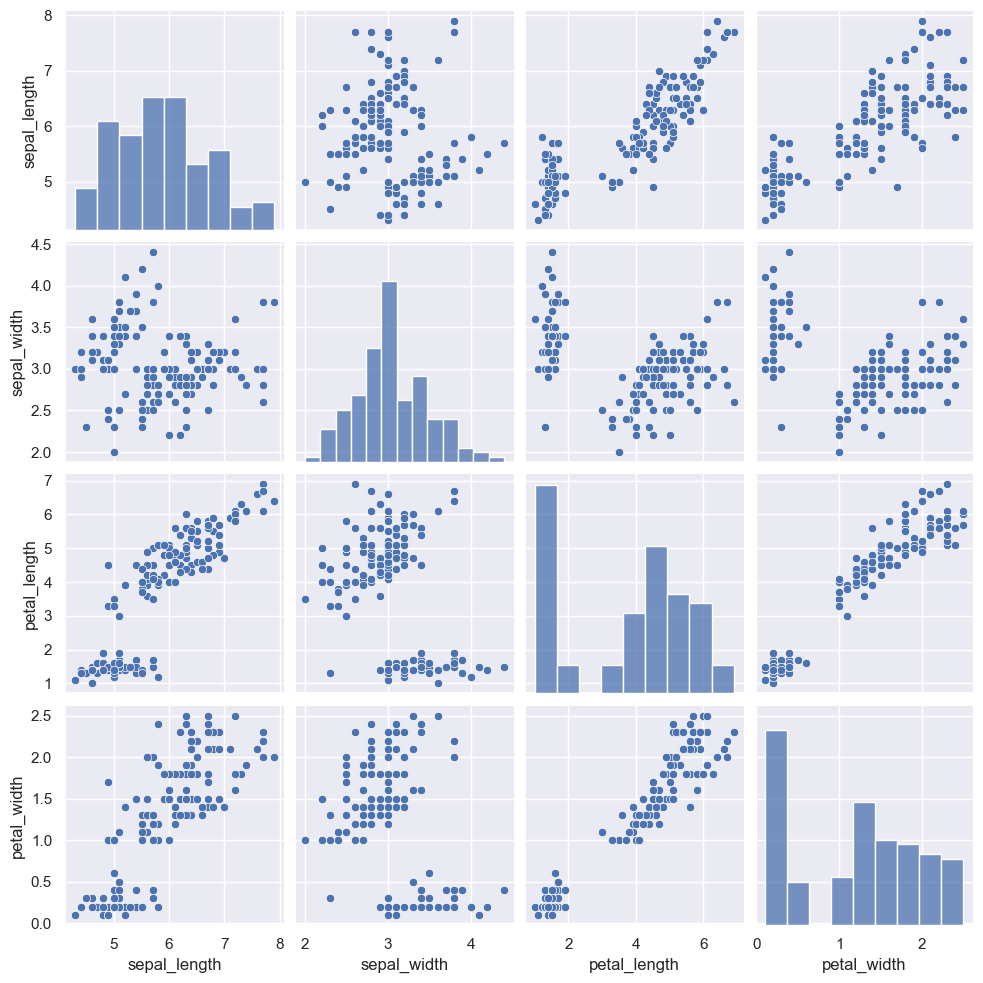

In [16]:
sns.pairplot(data = dados)

Aparentemente não existem outliers também!

Ao analisar cuidadosamente os gráficos, podemos perceber pelo menos um grupo claramente definido nos gráficos. Então sabemos que existe ao menos dois tipos de flores íris

Mas precisamos testar nossa teoria e verificar se faz sentido. Para isso é válido a utilização de um método de agrupamento

## 3. Agrupamento de dados (clustering)

Vamos utilizar um método simples e confiável para separação e agrupamento de dados, o K-Means.

Esse método é capaz de lidar efetivamente com as necessidades e peculiaridades de um processo de clustering (como escolher o lugar para iniciar o centroid em busca de obter o resultado mais apropriado para os dados em questão).

#### *Lembrando que já sabemos que existem ao menos dois grupos, vamos iniciar assim

In [24]:
# Copiando a variável para poder usar a original futuramente se necessário
clustering = dados.copy()

# Criando um objeto K-means com 2 clusters
kmeans = KMeans(2)

# Adicionando os dados
kmeans.fit(clustering)

KMeans(n_clusters=2)

Agora que temos os clusters, vamos salvar seu valor em uma coluna separada para visualizarmos no gráfico

In [26]:
clustering['Clusters'] = kmeans.fit_predict(clustering)

# Verificando se deu certo
clustering

,sepal_length,sepal_width,petal_length,petal_width,Clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


Ótimo. Agora vamos verificar os gráficos novamente com a separação dos grupos

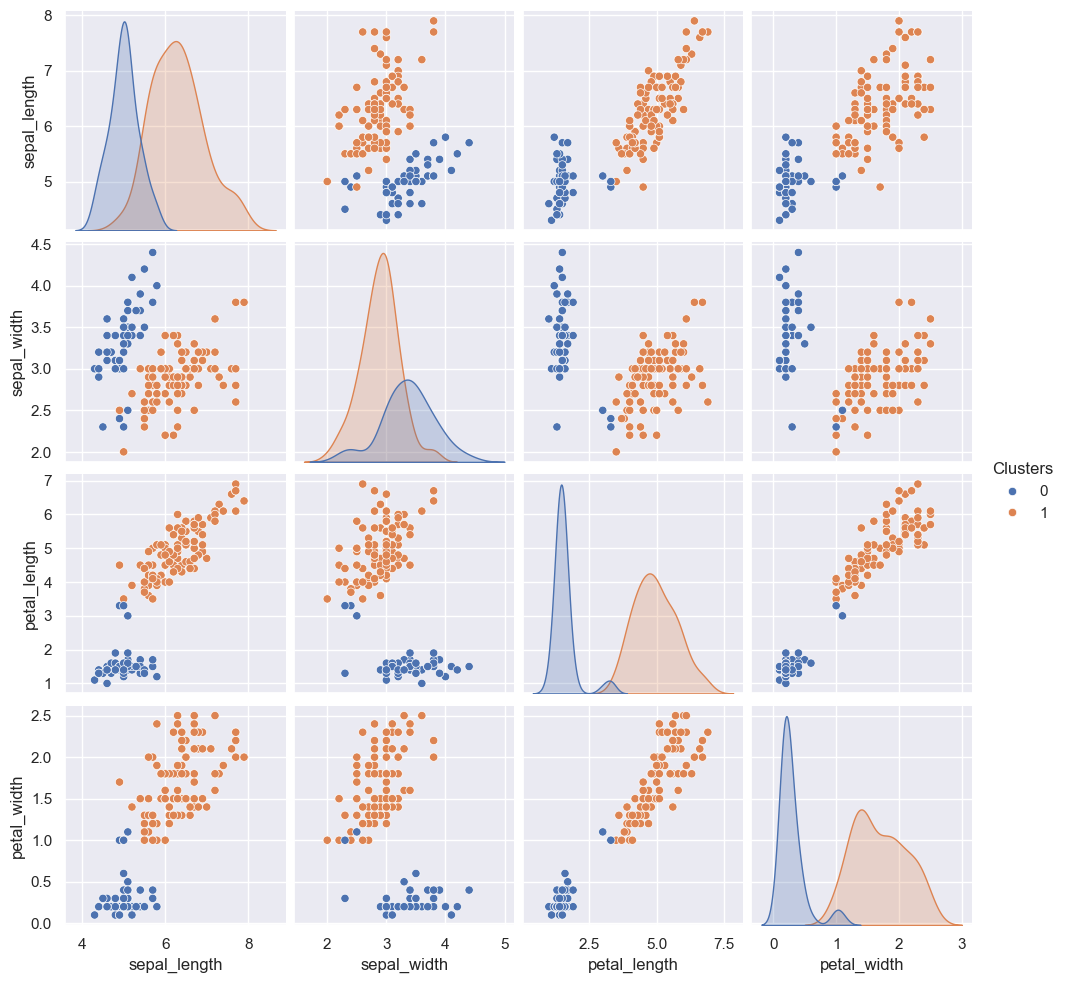

In [28]:
# Será feita a mesma visualização, mas vamos mudar as cores de acordo com a coluna dos Clusters que criamos nos dados
sns.pairplot(data = clustering, hue = 'Clusters')

### Ao visualizar o gráfico, podemos chegar a conclusão que existem mais de dois grupos. Isso se dá por alguns motivos:

1 - As distribuições possuem algumas variações próximas à calda, de modo que formam uma outra distribuição

2 - Também conseguimos ver que alguns dados estão misturados entre os diferentes grupos

3 - E um pouco mais abstrato é a visualização de que o grupo azul acaba se extendendo o suficiente para uma generalização muito grande, ao invés de um grupo bem definido

Para verificar quantos grupos podem ser ideais para esse problema, vamos utilizar o método do 'cotovelo' com WCSS

## 4. Método do 'Cotovelo'

#### O método do cotovelo consiste em verificar a soma das distâncias quadradas (WCSS) dos pontos e seu centroid para diferentes números de clusters
#### Quanto menor forem as distâncias mais definido é o grupo, ou cluster

Encontrando o WCSS

In [37]:
wcss = []

max_clusters = 10
for i in range(1, max_clusters):
    kmeans = KMeans(i)
    kmeans.fit(dados) #Vamos utilizar os dados originais, já que a variável 'clustering' possui uma coluna criada por nós
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

### Utilizando o método do 'cotovelo'

Text(0, 0.5, 'WCSS')

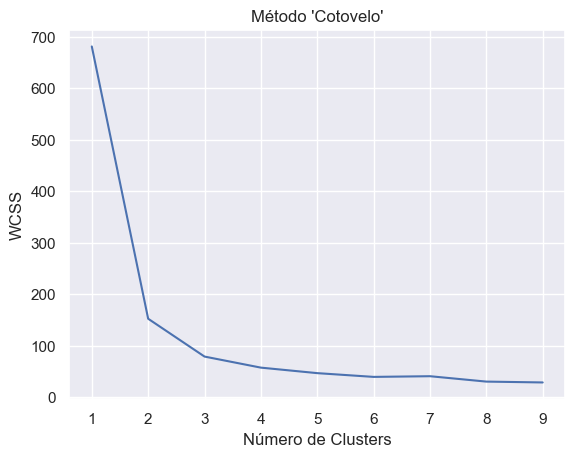

In [39]:
numero_clusters = range(1,max_clusters)
plt.plot(numero_clusters,wcss)
plt.title('Método \'Cotovelo\'')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')

### Como 'ler' o método do cotovelo: Quanto menor o valor do WCSS, mais definido é o cluster

#### Então no próprio gráfico podemos ver a nossa análise inicial (que existem ao menos 2 grupos, dado pela distância entre 1 e 2 no gráfico)
#### Mas podemos ver uma distância considerável entre 2 e 3, mas não muito grande do 3 para frente
#### Podemos assumir que tem 3 grupos de flores íris pelo gráfico, mas para garantir, vamos visualizar com 4 clusters e depois com 3

## 5. Testando conclusões 

### 4 Clusters

In [44]:
clusters_4 = dados.copy()

kmeans_4 = KMeans(4)

kmeans_4.fit(clusters_4)

KMeans(n_clusters=4)

In [45]:
clusters_4['Clusters'] = kmeans_4.fit_predict(clusters_4)

In [ ]:
sns.pairplot(data = clusters_4, hue = 'Clusters', palette = 'viridis')

#### Conseguimos visualizar claramente um grupo, mas os outros não aparentam bem delimitados

#### Não fica muito claro onde as características de uma flor acabam e outra começa, além de as características estarem misturadas em alguns casos (mais de um grupo dividindo o 'mesmo' espaço) 

#### Então agora vamos verificar com 3 clusters (a resposta que parecia mais viável de acordo com o método do cotovelo)

### 3 Clusters

In [ ]:
clusters_3 = dados.copy()

kmeans_3 = KMeans(3, random_state = 42)

kmeans_3.fit(clusters_3)

In [ ]:
clusters_3['Clusters'] = kmeans_3.fit_predict(clusters_3)

In [ ]:
sns.pairplot(data = clusters_3, hue = 'Clusters', palette = 'viridis')

#### Ainda que algumas características se misturem perto dos 'limites' de alguns grupos, é clara a diferença, visualização e separação das diferentes flores

## 6. Considerações finais

#### Alguns dados ficaram sobrepostos ou irrelevantes se separados por mais de 3 grupos
#### Indicando que provavelmente nossa solucão tenha apenas 3 grupos, ou seja, iris possuam apenas 3 grupos de flores

### Conseguimos verificar isso ao comparar um dataset com os nomes de íris com nossa análise

In [ ]:
resultado = pd.read_csv('iris_with_answers.csv')

resultado.head()

In [ ]:
# Verificando a quantidade de espécies e seus nomes
print("Quantidade de espécies: " + str(len(resultado['species'].unique())))
print("Nomes: " + str(resultado['species'].unique()))

### E para finalizar vamos visualizar os gráficos

In [ ]:
# Sabemos que existe um campo chamado 'species' com as diferentes espécies, vamos ver a quantidade
sns.pairplot(data = resultado, hue = 'species', palette = 'viridis')

## 7. Bônus: Visualização da nossa separação com o resultado ideal

### Observando os gráficos conseguimos perceber o seguinte padrão:
### setosa = 1
### versicolor = 2
### virginica = 0
*De acordo com nossa separação e os dados originais

In [ ]:
# Primeiro vamos pegar os dados resultados do nosso kmeans
y_kmeans = clusters_3['Clusters']

# Ajustar os rótulos dos clusters para as classes reais
mapeamento_classes = {"versicolor": 2, "setosa": 1, "virginica": 0}

y_resultado = resultado['species'].map(mapeamento_classes)

In [ ]:
# Gerar matriz de confusão

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_kmeans, y_resultado)

# Plotar a matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", 
            xticklabels=["Versicolor", "Setosa", "Virginica"], 
            yticklabels=["Versicolor", "Setosa", "Virginica"])
plt.xlabel("Clusters do KMeans")
plt.ylabel("Classes reais")
plt.title("Matriz de Confusão - KMeans vs Classes Reais")
plt.show()

De acordo com a matriz de confusão, a separação por clusters foi capaz de classificar corretamente as versicolors e virginica (96%), já para Setosa, acabou confundindo um pouco, obtendo (72%)